Objective: Improve customer experience by analysing sales data and increase revenue

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\Pooja Dhanush\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv',encoding = 'unicode escape')

In [7]:
df.shape

(11251, 15)

In [9]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
#drop unrelated blank columns
df.drop(['Status','unnamed1'],axis=1,inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [14]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [15]:
#filter the rows with atleast one null value
rows_with_nulls = df[df.isnull().any(axis = 1)]
print("Rows with null values")
print(rows_with_nulls)

Rows with null values
     User_ID Cust_name Product_ID Gender Age Group  Age  Marital_Status   
7    1002092  Shivangi  P00273442      F       55+   61               0  \
14   1003858      Cano  P00293742      M     46-50   46               1   
16   1005447       Amy  P00275642      F     46-50   48               1   
109  1005265    Sakshi  P00296242      F     46-50   48               1   
111  1005261   Apoorva  P00057942      F     36-45   41               1   
184  1005538    Kartik  P00269542      F     46-50   49               1   
293  1000326  Jonathan  P00120542      M     51-55   53               0   
344  1002507   Lakshmi  P00045842      F     26-35   35               1   
345  1004498   Srishti  P00030842      F     51-55   55               0   
452  1004601    Gaurav  P00014442      F     36-45   40               1   
464  1004528    Anurag  P00338442      F     26-35   33               1   
493  1002994    Hemant   P0009942      F     36-45   38               0   

  

In [17]:
#Calculate the mean value and fill NA with mean for that category
df['Amount'] = df.groupby('Product_Category')['Amount'].transform(lambda x:x.fillna(x.mean()))

In [19]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [20]:
#check whether it fill the rows
selected_rows = df[(df['User_ID']==1000326) & (df['Product_ID']=='P00120542')]
print(selected_rows)

     User_ID Cust_name Product_ID Gender Age Group  Age  Marital_Status   
293  1000326  Jonathan  P00120542      M     51-55   53               0  \

       State     Zone Occupation  Product_Category  Orders        Amount  
293  Gujarat  Western  IT Sector  Footwear & Shoes       3  14707.468791  


In [21]:
df['Amount']=df['Amount'].astype('int')

In [22]:
#to cross check whether the datatype has changed
df['Amount'].dtypes

dtype('int32')

In [23]:
#to see all the columns in the data
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [26]:
df.rename(columns={'Maritial_Status':'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [27]:
#describe function returns description of data in the dataframe(i.e count,mean,std..etc...)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


EDA:Exploratory Data Analysis

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

Gender

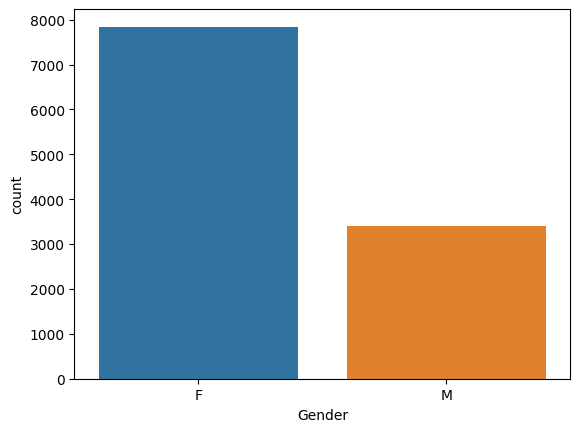

In [29]:
#plotting a barchart for gender and its count
ax = sns.countplot(x= 'Gender',data= df)

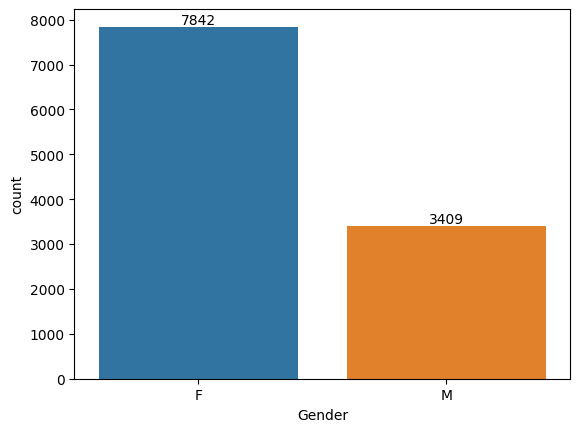

In [31]:
#to determine the count of each bars
ax = sns.countplot(x= 'Gender',data= df)

for bars in ax.containers:
    ax.bar_label(bars)

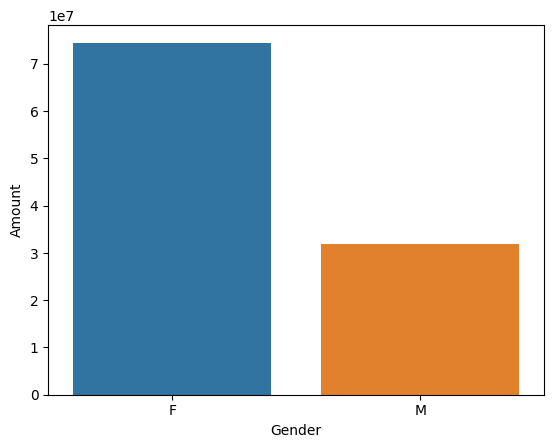

In [33]:
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x='Gender',y = 'Amount',data = sales_gen)

for bars in ax.containers:
    ax.bar_label(bars)

From the above graph it is clear that most of the buyers are females and even purchasing power of females is greater than men

Age

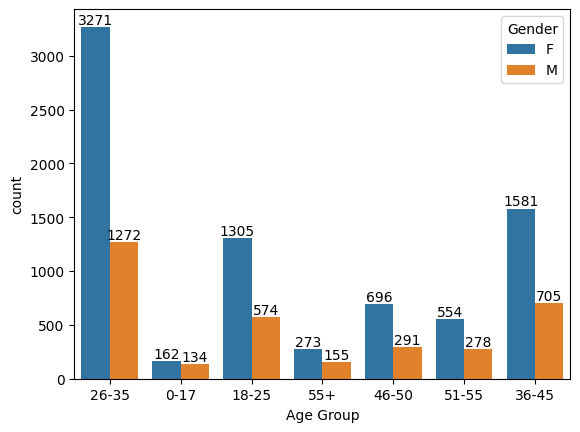

In [35]:
ax = sns.countplot(data = df, x= 'Age Group',hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

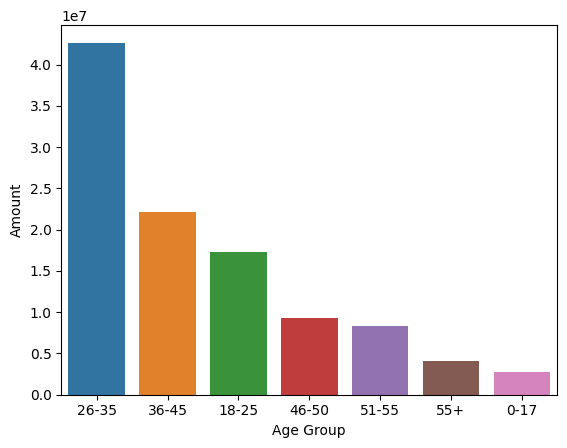

In [37]:
#to find the purchasing power
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x='Age Group',y = 'Amount',data = sales_age)

for bars in ax.containers:
    ax.bar_label(bars)

From the above graph it is clear that most of the buyers are of the age group of 26-35 yrs female

State

<Axes: xlabel='State', ylabel='Orders'>

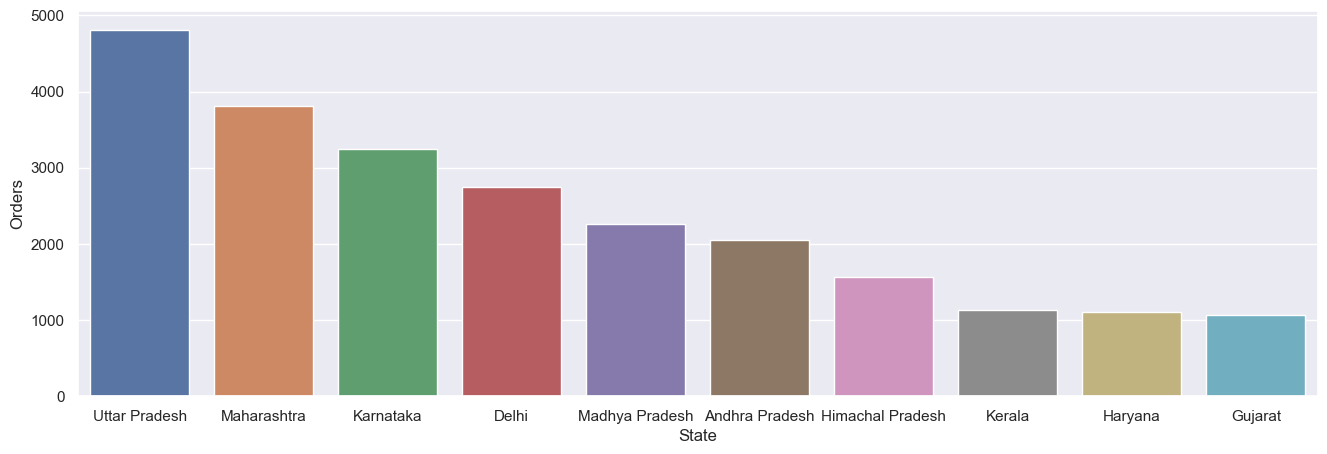

In [42]:
sales_state = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data= sales_state,x='State',y = 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

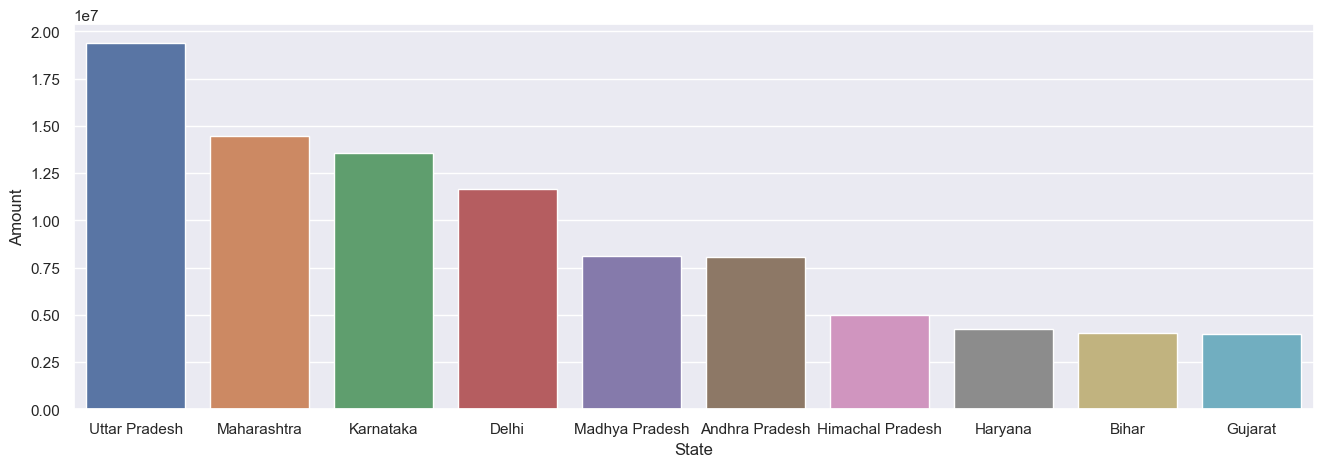

In [43]:
#purchasing power
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data= sales_state,x='State',y = 'Amount')

From the above graph it is clear that most of the orders and purchasing power are from Uttarpradesh,Maharastra and Karnataka

Maritial Status

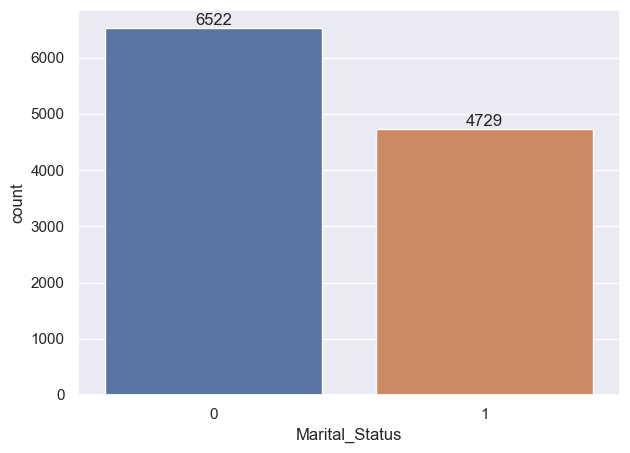

In [49]:
ax = sns.countplot(data = df, x= 'Marital_Status')
sns.set(rc={'figure.figsize':(10,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

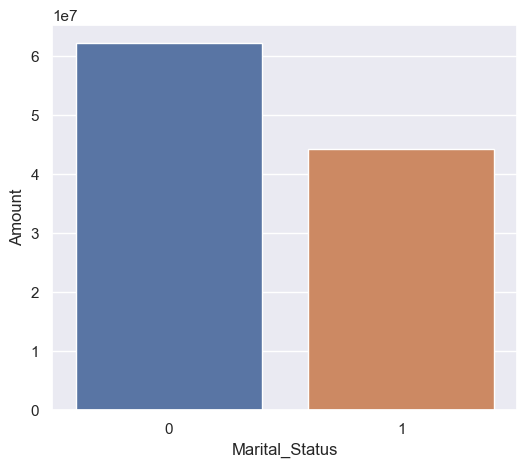

In [55]:
#purchasing power
sales_status = df.groupby(['Marital_Status'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data= sales_status,x='Marital_Status',y = 'Amount')

From the above graph it is clear that most of the buyers are unmarried and having high purchasing power

Occupation

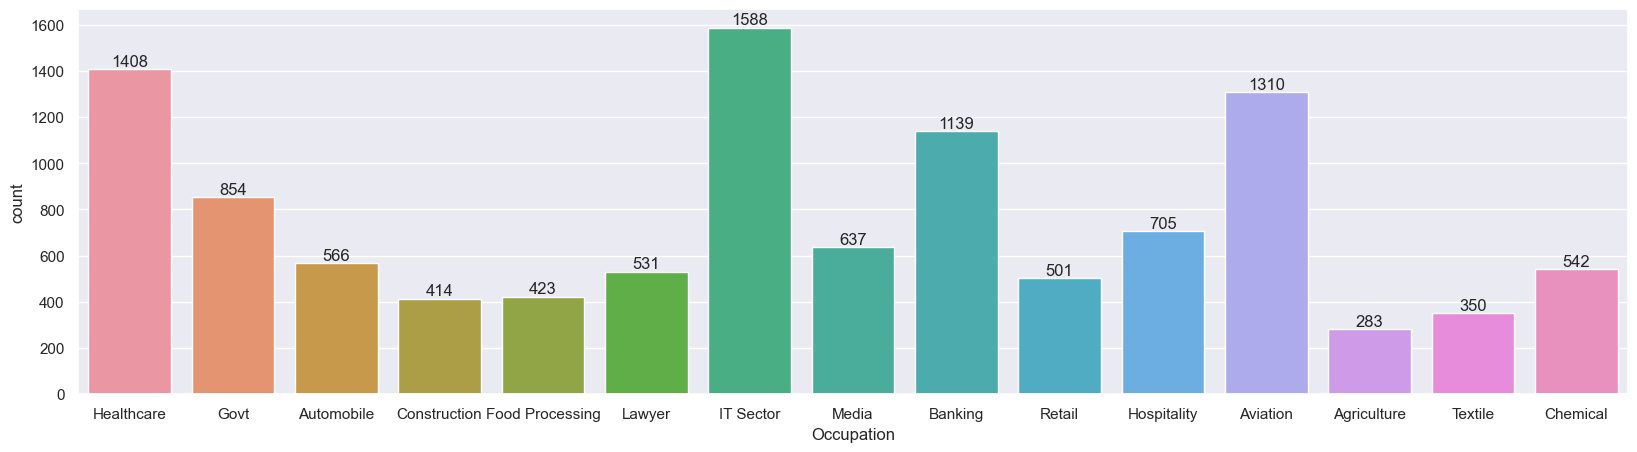

In [57]:
ax= sns.countplot(x= 'Occupation',data= df)
sns.set(rc={'figure.figsize':(15,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

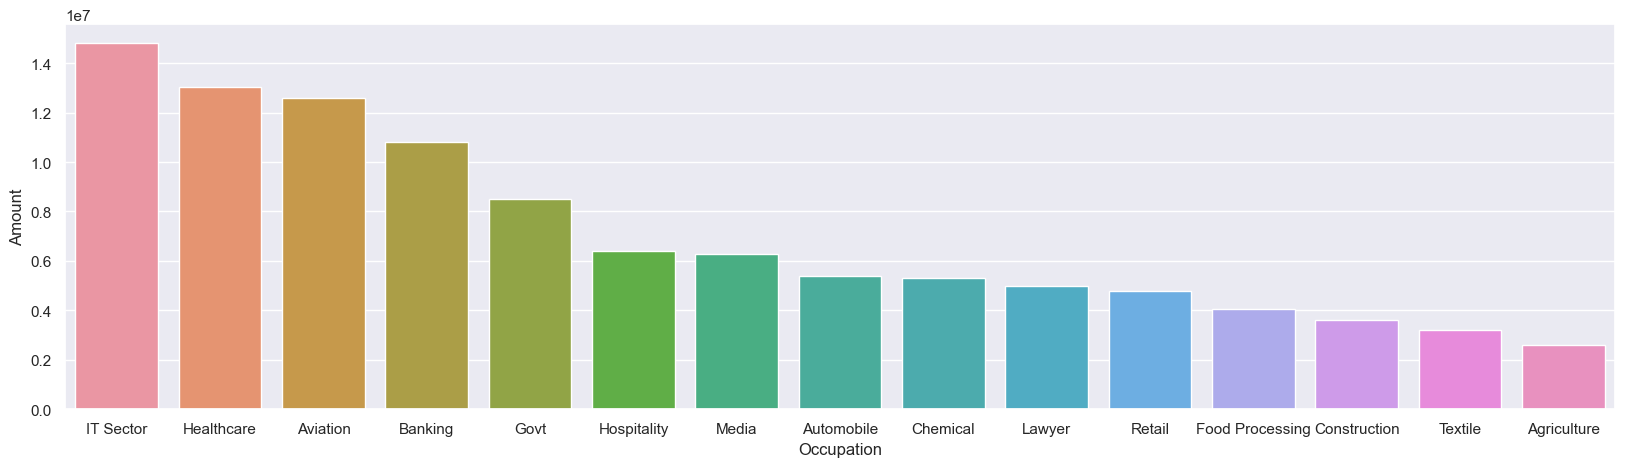

In [58]:
#purchasing power
sales_status = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_status,x='Occupation',y = 'Amount')

From the graph it is clear that most of the buyers are working under IT,Healthcare and aviation industry.

Product Category

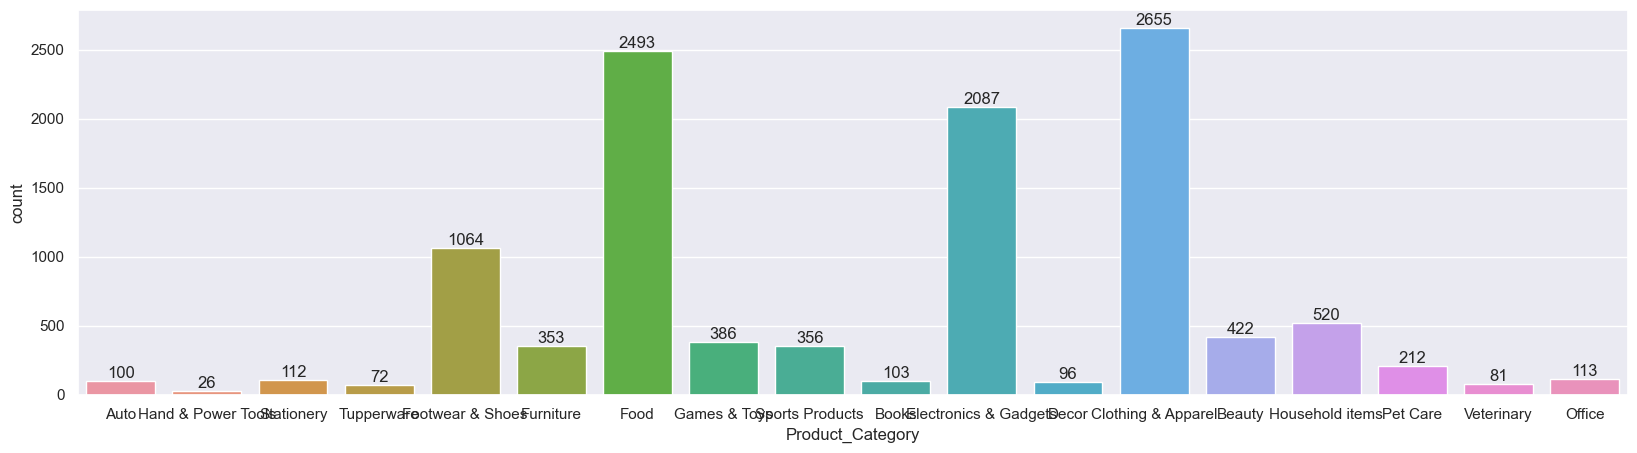

In [65]:
ax= sns.countplot(x= 'Product_Category',data= df)
sns.set(rc={'figure.figsize':(16,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

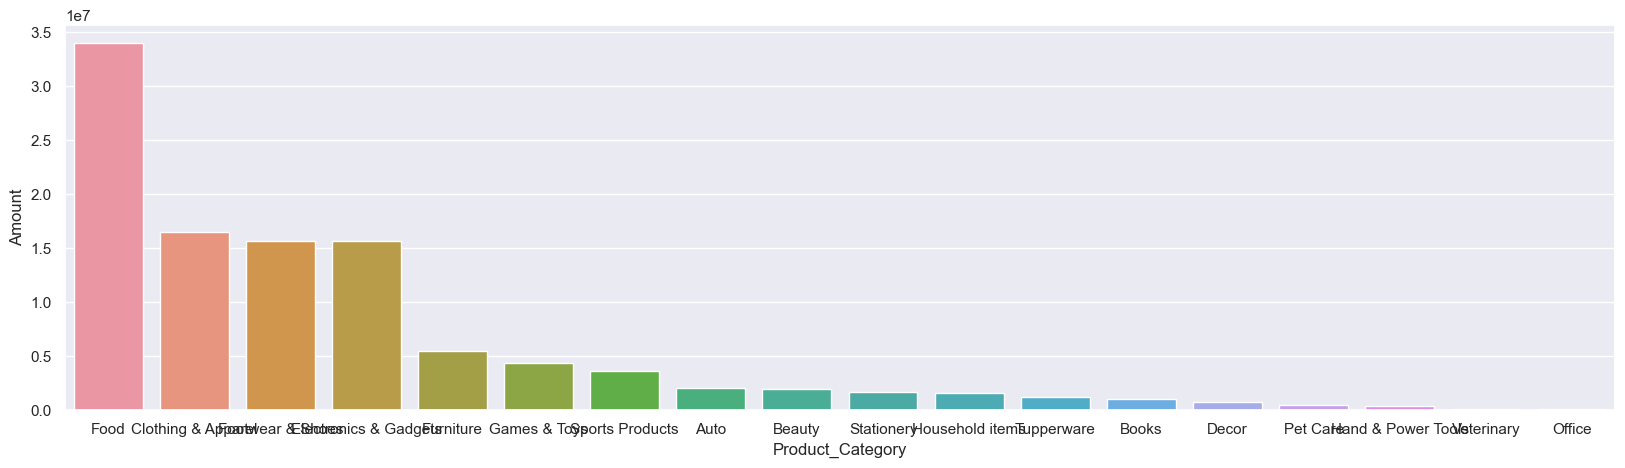

In [66]:
#purchasing power
sales_category = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_category,x='Product_Category',y = 'Amount')

From the above graph it is clear that most of the products are from food,clothing and electronics category.

Product_ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

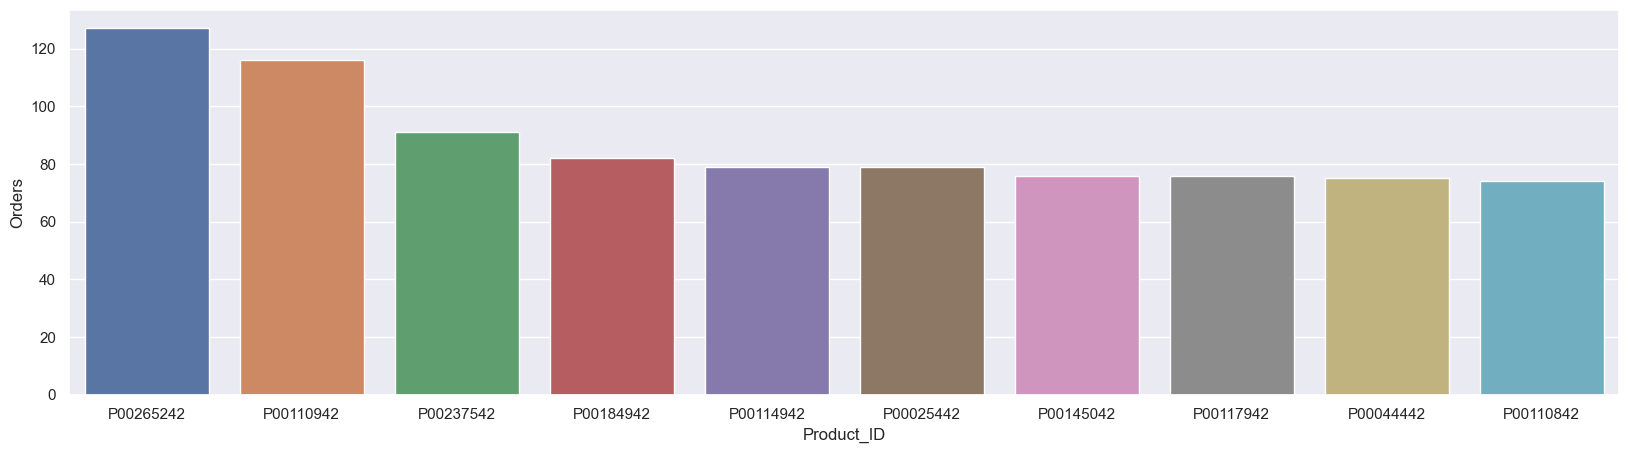

In [69]:
sales_product = df.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data= sales_product,x='Product_ID',y = 'Orders')

<Axes: xlabel='Product_ID'>

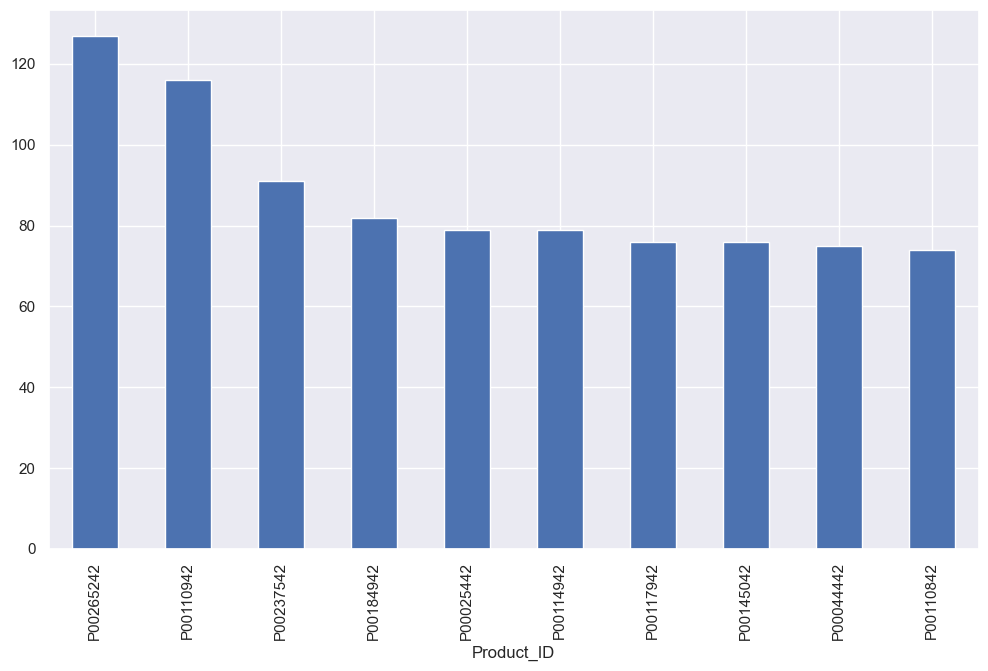

In [70]:
#top 10 most sold products same as above
fig1,ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind='bar')

Final Conclusion
Married women of age group between 26-35 yrs from UP,Maharastra and Karnataka working in IT,Healthcare and Aviation are more likely to buy products from food,clothing and electronics category.
